In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.linalg.misc import norm
from numpy import *

time=1000

# Load the experiment data.
def get_data():
    data = load_svmlight_file("australian_scale.txt")
    return data[0], data[1]

X,y=get_data()
loss_mintrainhistory=[]
loss_mintesthistory=[]

# append the bias dimension of ones
X=np.hstack([X.toarray(), np.ones((X.shape[0], 1))])

# Divide dataset into training set and validation set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.reshape(-1,1)

In [2]:
maxAccuracy=0
for j in range(100):
    C = 10**np.random.uniform(0, 2)
    learning_rate = 10**np.random.uniform(-4, -2)
    # Initialize SVM model parameters. Random Initializion
    # w: A numpy array of shape (1, D) containing weights.
    w=np.random.random((1,15))
    loss_trainhistory=[]
    loss_testhistory=[]
    for k in range(time):
        #  Choose loss function and derivation L=(‖w‖_^2)/2+  C/n ∑_(i=1)^n▒〖max(0,1-yi(w^T xi))〗

        #  Get the loss L_train under the trainin set and L_validation by validating under validation set.
        trainloss=0.5*(np.linalg.norm(w,2)**2)+C*np.mean(np.maximum(1-y_train*X_train.dot(w.T),0))
        testloss=0.5*(np.linalg.norm(w,2)**2)+C*np.mean(np.maximum(1-y_test*X_test.dot(w.T),0))
        loss_trainhistory.append(trainloss)
        loss_testhistory.append(testloss)
        a1=1-y_train*X_train.dot(w.T)

        #  Calculate gradient G toward loss function from all samples.
        dw=np.zeros((1,X_train.shape[1]))
        for i in range(a1.shape[0]):
            if a1[i]>=0:
                dw+=-y_train[i]*X_train[i].reshape((1,15))

        dw=C*dw/X_train.shape[0]+w
        # Update model: W_t=W_(t-1)+ηD .
        w=w-learning_rate*dw
    
    # compute the Accuracy 
    t = X_test.dot(w.T) > 0
    count = 0
    for i in range(X_test.shape[0]):
        if t[i][0] == False and y_test[i]== -1:
            count = count + 1
        elif t[i][0] == True and y_test[i]== 1:
            count = count + 1

    Accuracy = count / y_test.shape[0]
    if Accuracy > maxAccuracy:
        maxAccuracy=Accuracy
        loss_mintrainhistory = loss_trainhistory
        loss_mintesthistory = loss_testhistory
    print(j,'time:','C =',C,'learning_rate =',learning_rate,'Accuracy =',Accuracy)
print(maxAccuracy)

0 time: C = 6.911977572880469 learning_rate = 0.005974103498981856 Accuracy = 0.8623188405797102
1 time: C = 35.980911243467695 learning_rate = 0.0004227618967039031 Accuracy = 0.8623188405797102
2 time: C = 2.889955157790256 learning_rate = 0.0007009996345398302 Accuracy = 0.8768115942028986
3 time: C = 5.5469171679393865 learning_rate = 0.004121849079127068 Accuracy = 0.8623188405797102
4 time: C = 2.350925128083415 learning_rate = 0.002969752271043208 Accuracy = 0.8623188405797102
5 time: C = 1.056699892818155 learning_rate = 0.00011228042261479921 Accuracy = 0.7536231884057971
6 time: C = 12.914927143878666 learning_rate = 0.00045327128950569024 Accuracy = 0.8768115942028986
7 time: C = 27.711344968707618 learning_rate = 0.0008022342624869193 Accuracy = 0.8623188405797102
8 time: C = 4.80485203165628 learning_rate = 0.00416503144841753 Accuracy = 0.8623188405797102
9 time: C = 32.7630233769898 learning_rate = 0.0043304026720363525 Accuracy = 0.8623188405797102
10 time: C = 21.43396

83 time: C = 21.003555707275915 learning_rate = 0.0001811783783796625 Accuracy = 0.855072463768116
84 time: C = 6.948475794633287 learning_rate = 0.0007178932843896665 Accuracy = 0.8623188405797102
85 time: C = 74.62677060268008 learning_rate = 0.004482214113127222 Accuracy = 0.8623188405797102
86 time: C = 87.32020065165284 learning_rate = 0.001660771243286567 Accuracy = 0.8623188405797102
87 time: C = 12.3836218186468 learning_rate = 0.0006935866189450775 Accuracy = 0.8623188405797102
88 time: C = 1.1905069036115414 learning_rate = 0.00016768951199018042 Accuracy = 0.7101449275362319
89 time: C = 3.6193177203068116 learning_rate = 0.0025600203740948515 Accuracy = 0.8623188405797102
90 time: C = 2.525880321326343 learning_rate = 0.0003481452278685199 Accuracy = 0.8188405797101449
91 time: C = 10.01051905019399 learning_rate = 0.0059585394077674315 Accuracy = 0.8623188405797102
92 time: C = 7.859899452444416 learning_rate = 0.0006035175627906402 Accuracy = 0.8623188405797102
93 time: C

In [22]:
# C = 14.564112311939512 learning_rate = 0.00041467375152147987 
C = 19.63122532317003
learning_rate = 0.00026742186102342405
w=np.random.random((1,15))
loss_mintrainhistory=[]
loss_mintesthistory=[]
for k in range(10000):
        #  Choose loss function and derivation L=(‖w‖_^2)/2+  C/n ∑_(i=1)^n▒〖max(0,1-yi(w^T xi))〗

        #  Get the loss L_train under the trainin set and L_validation by validating under validation set.
    trainloss=0.5*(np.linalg.norm(w,2)**2)+C*np.mean(np.maximum(1-y_train*X_train.dot(w.T),0))
    testloss=0.5*(np.linalg.norm(w,2)**2)+C*np.mean(np.maximum(1-y_test*X_test.dot(w.T),0))
    loss_mintrainhistory.append(trainloss)
    loss_mintesthistory.append(testloss)
    a1=1-y_train*X_train.dot(w.T)

        #  Calculate gradient G toward loss function from all samples.
    dw=np.zeros((1,X_train.shape[1]))
    for i in range(a1.shape[0]):
        if a1[i]>=0:
             dw+=-y_train[i]*X_train[i].reshape((1,15))

    dw=C*dw/X_train.shape[0]+w
        # Update model: W_t=W_(t-1)+ηD .
    w=w-learning_rate*dw

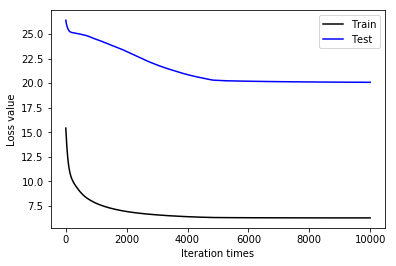

In [23]:
#  drawing graph of L_train as well as L_validation with the number of iterations.
plt.plot(loss_mintrainhistory,'black',label='Train')
plt.plot(loss_mintesthistory,'blue',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [24]:
# compute the Accuracy 
t = X_test.dot(w.T) > 0
count = 0
for i in range(X_test.shape[0]):
    if t[i][0] == False and y_test[i]== -1:
        count = count + 1
    elif t[i][0] == True and y_test[i]== 1:
        count = count + 1

count / y_test.shape[0]

0.8623188405797102